# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +63.58608513339                   -2.50    3.85s
  2   +57.75866392115        0.77       -1.38   11.7ms
  3   +42.45495490152        1.18       -1.00   40.2ms
  4   +33.56822535282        0.95       -0.86   14.5ms
  5   +14.27537330007        1.29       -0.68   17.2ms
  6   +9.695796411860        0.66       -0.74   13.4ms
  7   +8.274020851449        0.15       -0.65   10.8ms
  8   +7.389303459702       -0.05       -0.73   13.5ms
  9   +6.686218240538       -0.15       -0.76   13.5ms
 10   +6.319198809302       -0.44       -0.74   11.4ms
 11   +6.075481821820       -0.61       -0.72   11.5ms
 12   +5.923633784907       -0.82       -0.74   8.78ms
 13   +5.809839305874       -0.94       -0.74   11.4ms
 14   +5.701411790204       -0.96       -0.79   11.9ms
 15   +5.609152750710       -1.03       -0.84   8.83ms
 16   +5.585677404885       -1.63       -0.90   9.80ms
 17   +5.56

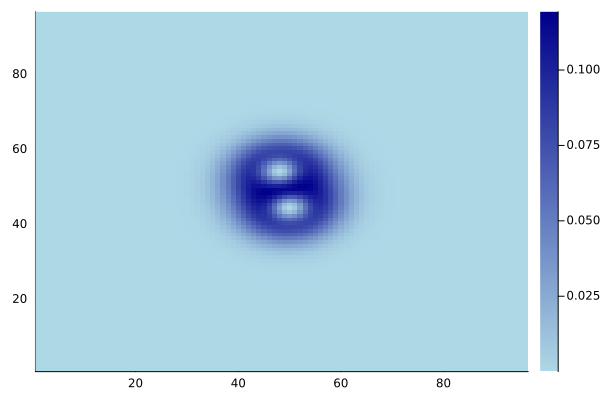

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π) = ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)